# Local Ricci Evolution Coefficients

In this notebook, we compute the local Ricci evolution coefficients for feed-forward neural networks. We test networks of different widths and depths, using both synthetic and real-world datasets. We begin by importing the necessary libraries.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from tqdm.auto import tqdm
import os
import sys

sys.path.append(os.path.abspath('..'))
from ricci_coefficients import Ricci_Coefficients
from helpers import train_model
from neural_networks import DNN
from datasets import DatasetFactory

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

num_iterations = 3      # Number of iterations used for averaging results

Using mps device


# 1. Real-World Datasets

## 1.1 MNIST 1 vs. 7

In [2]:
# Load datasets
X_train_MNIST_17, y_train_MNIST_17, X_test_MNIST_17, y_test_MNIST_17 = DatasetFactory.load_MNIST(digits=(1,7))

# Width and depths of networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train model
            model = DNN(input_dimension=784, hidden_units=width, depth=depth, vision_model=True)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_MNIST_17,
                y_train=y_train_MNIST_17,
                X_test=X_test_MNIST_17,
                y_test=y_test_MNIST_17
            )

            # Compute local Ricci evolution coefficients (using augmented-Forman Ricci curvature; for Ollivier use 'Ollivier-Ricci' and for the approximation of Ollivier use 'Approx-Ollivier-Ricci')
            local_ricci = Ricci_Coefficients(
                model, X_test_MNIST_17, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)


Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.740203,0.078834,0.968333
1,15,10,-0.823675,0.013331,0.996000
2,15,15,-0.831862,0.034257,0.990667
3,25,7,-0.794707,0.010528,0.983333
4,25,10,-0.868621,0.032268,0.999333
5,25,15,-0.823450,0.011936,0.999000
6,50,7,-0.823640,0.028542,0.990000
7,50,10,-0.852350,0.041202,0.996333
8,50,15,-0.855658,0.005952,1.000000


## 1.2 MNIST 6 vs. 9

In [ ]:
# Load datasets
X_train_MNIST_69,y_train_MNIST_69, X_test_MNIST_69, y_test_MNIST_69 = DatasetFactory.load_MNIST(digits=(6,9))

# Widths and depths of networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []
        
        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train model
            model = DNN(input_dimension=784, hidden_units=width, depth=depth, vision_model=True)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_MNIST_69,
                y_train=y_train_MNIST_69,
                X_test=X_test_MNIST_69,
                y_test=y_test_MNIST_69
            )
            # Calculate local Ricci evolution coefficients
            local_ricci = Ricci_Coefficients(
                model, X_test_MNIST_69, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')

            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.815209,0.011399,0.992000
1,15,10,-0.834544,0.063946,0.994667
2,15,15,-0.879101,0.015970,1.000000
3,25,7,-0.746385,0.153198,0.960333
4,25,10,-0.820142,0.035307,0.993667
5,25,15,-0.869572,0.019118,1.000000
6,50,7,-0.565781,0.168205,0.877667
7,50,10,-0.842635,0.003772,0.999333
8,50,15,-0.808460,0.034212,0.995755


## 1.3 Fashion-MNIST Shoes

In [ ]:
# Load datasets
X_train_fMNIST_shoes, y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST(classes=(5,7), device=device)

# Widths and depths of networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train model
            model = DNN(input_dimension=784, hidden_units=width, depth=depth, vision_model=True).to(device=device)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_fMNIST_shoes,
                y_train=y_train_fMNIST_shoes,
                X_test=X_test_fMNIST_shoes,
                y_test=y_test_fMNIST_shoes
            )
            # Calculate local Ricci evolution coefficients
            local_ricci = Ricci_Coefficients(
                model, X_test_fMNIST_shoes, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.773814,0.075109,0.993667
1,15,10,-0.858128,0.038418,1.000000
2,15,15,-0.888107,0.033801,0.999667
3,25,7,-0.804871,0.033003,0.993667
4,25,10,-0.745546,0.056421,0.991000
5,25,15,-0.817805,0.024168,1.000000
6,50,7,-0.779432,0.064822,0.989333
7,50,10,-0.867890,0.043112,0.998000
8,50,15,-0.877856,0.017407,1.000000


## 1.4 Fashion-MNIST Apperal

In [21]:
# Load datasets
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST(classes=(3,6), device=device)

# Widths and depths of networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train model
            model = DNN(input_dimension=784, hidden_units=width, depth=depth, vision_model=True).to(device=device)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_fMNIST_apperal,
                y_train=y_train_fMNIST_apperal,
                X_test=X_test_fMNIST_apperal,
                y_test=y_test_fMNIST_apperal
            )
            # Calculate local Ricci evolution coefficients
            local_ricci = Ricci_Coefficients(
                model, X_test_fMNIST_apperal, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.609557,0.038699,0.956000
1,15,10,-0.419799,0.156291,0.908333
2,15,15,-0.786017,0.027146,0.994667
3,25,7,-0.417236,0.178361,0.825000
4,25,10,-0.644953,0.080938,0.975070
5,25,15,-0.775911,0.061261,0.997333
6,50,7,-0.614906,0.012220,0.952000
7,50,10,-0.654282,0.048040,0.985610
8,50,15,-0.828296,0.030471,0.999667


## 1.5 CIFAR Car vs. Plane

In [3]:
# Load datasets
X_train_CIFAR, y_train_CIFAR, X_test_CIFAR, y_test_CIFAR = DatasetFactory.load_CIFAR(classes=(0,1), device=device)

# Widths and depths of networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train model
            model = DNN(input_dimension=3*32*32, hidden_units=width, depth=depth, vision_model=True).to(device=device)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_CIFAR,
                y_train=y_train_CIFAR,
                X_test=X_test_CIFAR,
                y_test=y_test_CIFAR
            )
            
            # Calculate local Ricci evolution coefficients
            local_ricci = Ricci_Coefficients(
                model, X_test_CIFAR, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.717438,0.057734,0.972667
1,15,10,-0.704115,0.214138,0.958333
2,15,15,-0.816659,0.046058,0.995333
3,25,7,-0.705982,0.095707,0.957667
4,25,10,-0.802124,0.065713,0.976667
5,25,15,-0.895741,0.018666,0.999000
6,50,7,-0.756972,0.030741,0.993000
7,50,10,-0.888650,0.005419,1.000000
8,50,15,-0.899376,0.008287,0.999667


# 2. Synthetic Datasets

## 2.1 Syn-I Dataset

In [24]:
# Load datasets
X_train_circles, y_train_circles = DatasetFactory.make_circles(noise=0.03)
X_test_circles, y_test_circles = DatasetFactory.make_circles(noise=0.03)

# Widths and depths of  networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train model
            model = DNN(input_dimension=2, hidden_units=width, depth=depth)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_circles,
                y_train=y_train_circles,
                X_test=X_test_circles,
                y_test=y_test_circles
            )

            # Calculate local Ricci evolution coefficients
            local_ricci = Ricci_Coefficients(
                model, X_test_circles, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.486836,0.024474,0.919000
1,15,10,-0.503620,0.095297,0.900667
2,15,15,-0.631552,0.051412,0.976000
3,25,7,-0.429697,0.059034,0.904000
4,25,10,-0.492137,0.066236,0.914667
5,25,15,-0.715011,0.022602,0.990333
6,50,7,-0.398098,0.033707,0.843000
7,50,10,-0.606064,0.039504,0.981667
8,50,15,-0.721841,0.031839,0.995667


## 2.2 Syn-II Dataset

In [31]:
# Load datasets
X_train_4circles, y_train_4circles = DatasetFactory.make_4circles()
X_test_4circles, y_test_4circles = DatasetFactory.make_4circles()

# Widths and depths of the networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train model    
            model = DNN(input_dimension=2, hidden_units=width, depth=depth)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_4circles,
                y_train=y_train_4circles,
                X_test=X_test_4circles,
                y_test=y_test_4circles
            )
            # Compute local Ricci evolution coefficients 
            local_ricci = Ricci_Coefficients(
                model, X_test_4circles, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

      

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.252001,0.177825,0.723000
1,15,10,-0.465552,0.092507,0.942667
2,15,15,-0.415852,0.094055,0.887000
3,25,7,-0.402722,0.134915,0.801333
4,25,10,-0.429881,0.020999,0.953508
5,25,15,-0.463425,0.048979,0.936667
6,50,7,-0.329784,0.152214,0.755333
7,50,10,-0.498097,0.040440,0.960000
8,50,15,-0.536816,0.049094,0.945000


## 2.3 Syn-III Dataset

In [29]:
# Load Datasets
X_train_cylinder,y_train_cylinder = DatasetFactory.make_cylinders()
X_test_cylinder,y_test_cylinder = DatasetFactory.make_cylinders()

# Widths and depths of networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):
            # Train models
            model = DNN(input_dimension=3, hidden_units=width, depth=depth)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_cylinder,
                y_train=y_train_cylinder,
                X_test=X_test_cylinder,
                y_test=y_test_cylinder
            )
            # Calculate local Ricci evolution coefficients
            local_ricci = Ricci_Coefficients(
                model, X_test_cylinder, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.625308,0.074268,0.985333
1,15,10,-0.721833,0.035734,0.992000
2,15,15,-0.595945,0.253539,0.837333
3,25,7,-0.522922,0.053765,0.926333
4,25,10,-0.747666,0.023254,0.999667
5,25,15,-0.706104,0.084809,0.983333
6,50,7,-0.685475,0.054986,0.987333
7,50,10,-0.743266,0.029619,0.999667
8,50,15,-0.826000,0.017653,0.999643


## 2.4 Syn-IV Dataset 

In [32]:
# Load datasets
X_train_tori, y_train_tori = DatasetFactory.make_tori()
X_test_tori, y_test_tori = DatasetFactory.make_tori()

# Widths and depths of networks
widths, depths = [15, 25, 50], [7, 10, 15]

# Dataframe for results
df_results = pd.DataFrame(columns=["Width", "Depth", "Mean_Ricci", "Std_Ricci", "Negative_Share"])

for width in widths:
    for depth in depths:
        local_ricci_coefs_mean = []
        share_negative = []

        for _ in tqdm(range(num_iterations), desc=f"Width={width}, Depth={depth}"):     
            # Train model   
            model = DNN(input_dimension=3, hidden_units=width, depth=depth)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_tori,
                y_train=y_train_tori,
                X_test=X_test_tori,
                y_test=y_test_tori
            )
            # Calculate local Ricci evolution coefficients
            local_ricci = Ricci_Coefficients(
                model, X_test_tori, 50
            ).local_ricci_coefficient(curv='Augmented-Forman-Ricci')
            local_ricci_coefs_mean.append(np.nanmean(local_ricci))
            valid = local_ricci[~np.isnan(local_ricci)]
            share_negative.append(np.mean(valid < 0))

        # Compute final aggregated stats and add to dataframe
        mean_of_means = np.mean(local_ricci_coefs_mean)
        std_of_means = np.std(local_ricci_coefs_mean)
        mean_of_neg_share = np.mean(share_negative)
        df_results.loc[len(df_results)] = [width, depth, mean_of_means, std_of_means, mean_of_neg_share]

df_results["Width"] = df_results["Width"].astype(int)
df_results["Depth"] = df_results["Depth"].astype(int)
df_results.head(9)

Width=15, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=15, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=25, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=7:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=10:   0%|          | 0/3 [00:00<?, ?it/s]

Width=50, Depth=15:   0%|          | 0/3 [00:00<?, ?it/s]

,Width,Depth,Mean_Ricci,Std_Ricci,Negative_Share
0,15,7,-0.437454,0.108343,0.863000
1,15,10,-0.487325,0.107640,0.933333
2,15,15,-0.676538,0.039743,0.967939
3,25,7,-0.269063,0.191685,0.732000
4,25,10,-0.520826,0.059340,0.919333
5,25,15,-0.671319,0.041950,0.985333
6,50,7,-0.278089,0.040428,0.733000
7,50,10,-0.325818,0.106605,0.809000
8,50,15,-0.554515,0.137954,0.892667


# 3. Local Ricci Coefficients Distribution

In this section we plot the entire distribution of local Ricci evolution coefficients on the real-world datasets.

## 3.1 Ollivier-Ricci curvature

### 3.1.1 MNIST 1 vs. 7

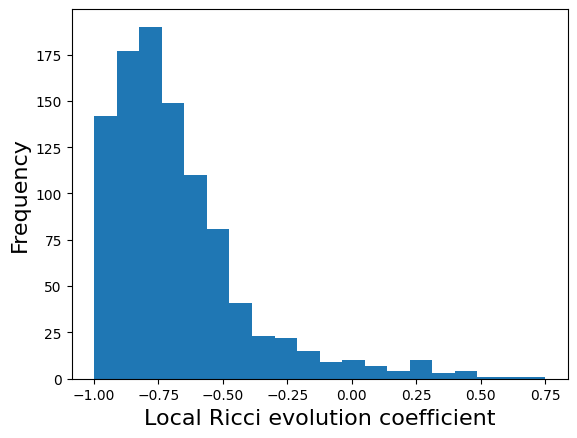

In [44]:
# Load dataset
X_train_MNIST_17,y_train_MNIST_17, X_test_MNIST_17, y_test_MNIST_17 = DatasetFactory.load_MNIST(digits=(1,7), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_MNIST_17,
    y_train=y_train_MNIST_17,
    X_test=X_test_MNIST_17,
    y_test=y_test_MNIST_17
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_MNIST_17, 50
).local_ricci_coefficient(curv='Ollivier-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.1.2 MNIST 6 vs. 9

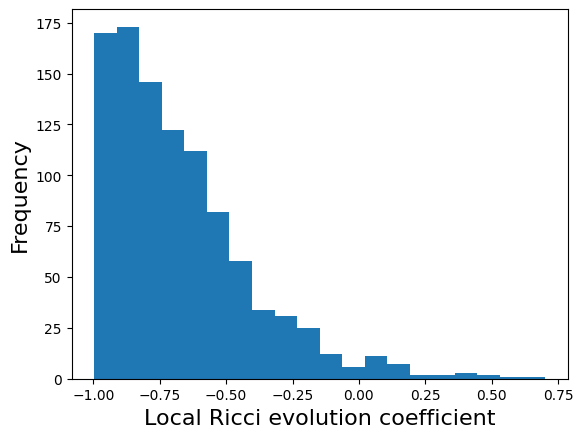

In [45]:
# Load dataset
X_train_MNIST_69,y_train_MNIST_69, X_test_MNIST_69, y_test_MNIST_69 = DatasetFactory.load_MNIST(digits=(6,9), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_MNIST_69,
    y_train=y_train_MNIST_69,
    X_test=X_test_MNIST_69,
    y_test=y_test_MNIST_69
)

# Compute local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_MNIST_69, 50
).local_ricci_coefficient(curv='Ollivier-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.1.3 Fashion-MNIST Shoes

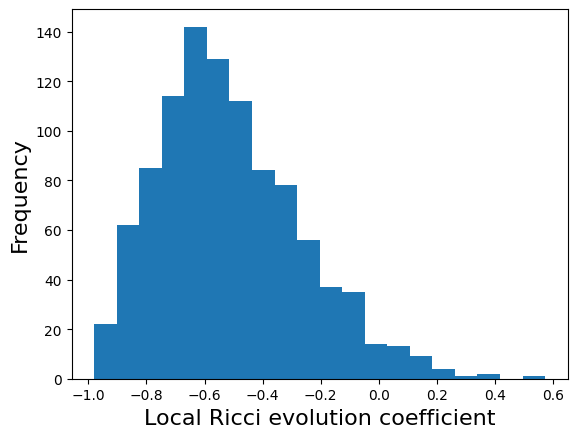

In [ ]:
# Load dataset
X_train_fMNIST_shoes,y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST(classes=(5,7), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_fMNIST_shoes,
    y_train=y_train_fMNIST_shoes,
    X_test=X_test_fMNIST_shoes,
    y_test=y_test_fMNIST_shoes
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_fMNIST_shoes, 50
).local_ricci_coefficient(curv='Ollivier-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.1.4 Fashion-MNIST Apperal

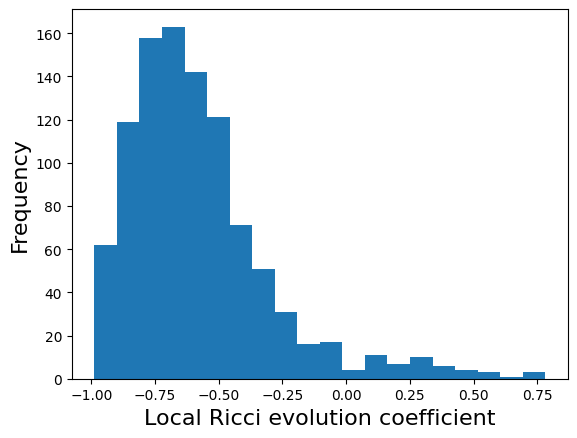

In [47]:
# Load dataset
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST((3,6), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_fMNIST_apperal,
    y_train=y_train_fMNIST_apperal,
    X_test=X_test_fMNIST_apperal,
    y_test=y_test_fMNIST_apperal
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_fMNIST_apperal, 50
).local_ricci_coefficient(curv='Ollivier-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.1.5 CIFAR Car vs. Plane

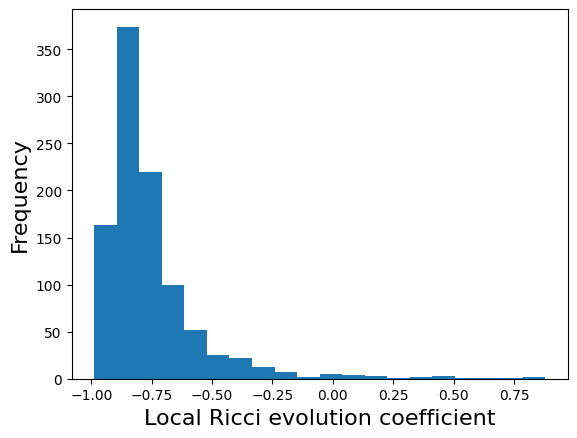

In [4]:
# Load dataset
X_train_CIFAR, y_train_CIFAR, X_test_CIFAR, y_test_CIFAR = DatasetFactory.load_CIFAR((0,1), device=device)

# Train model
model = DNN(input_dimension=3*32*32, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_CIFAR,
    y_train=y_train_CIFAR,
    X_test=X_test_CIFAR,
    y_test=y_test_CIFAR
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_CIFAR, 50
).local_ricci_coefficient(curv='Ollivier-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

## 3.2 Forman-Ricci curvature

### 3.2.1 MNIST 1 vs. 7

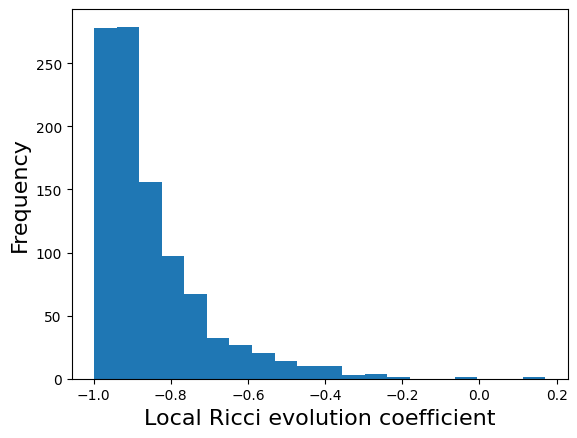

In [38]:
# Load dataset
X_train_MNIST_17,y_train_MNIST_17, X_test_MNIST_17, y_test_MNIST_17 = DatasetFactory.load_MNIST(digits=(1,7), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_MNIST_17,
    y_train=y_train_MNIST_17,
    X_test=X_test_MNIST_17,
    y_test=y_test_MNIST_17
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_MNIST_17, 50
).local_ricci_coefficient(curv='Augmented-Forman-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.2.2 MNIST 6 vs. 9

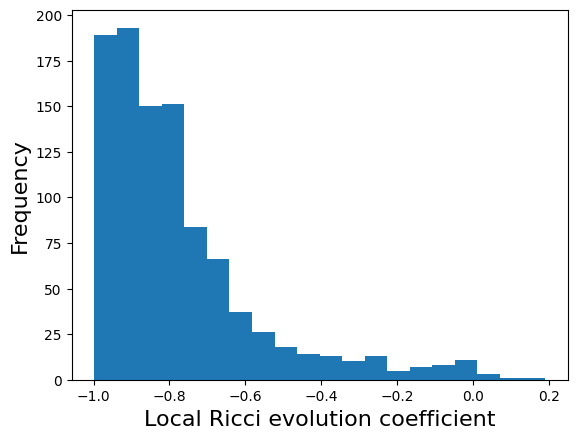

In [39]:
# Load dataset
X_train_MNIST_69,y_train_MNIST_69, X_test_MNIST_69, y_test_MNIST_69 = DatasetFactory.load_MNIST(digits=(6,9), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_MNIST_69,
    y_train=y_train_MNIST_69,
    X_test=X_test_MNIST_69,
    y_test=y_test_MNIST_69
)

# Compute local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_MNIST_69, 50
).local_ricci_coefficient(curv='Augmented-Forman-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.2.3 Fashion-MNIST Shoes

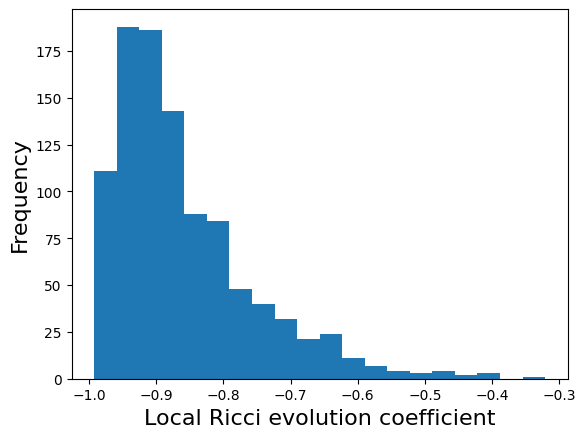

In [40]:
# Load dataset
X_train_fMNIST_shoes,y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST((5,7), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_fMNIST_shoes,
    y_train=y_train_fMNIST_shoes,
    X_test=X_test_fMNIST_shoes,
    y_test=y_test_fMNIST_shoes
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_fMNIST_shoes, 50
).local_ricci_coefficient(curv='Augmented-Forman-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.2.4 Fashion-MNIST Apperal

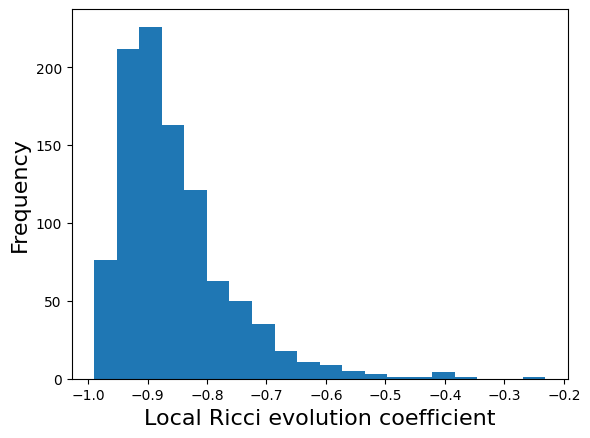

In [42]:
# Load dataset
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST((3,6), device=device)

# Train model
model = DNN(input_dimension=784, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_fMNIST_apperal,
    y_train=y_train_fMNIST_apperal,
    X_test=X_test_fMNIST_apperal,
    y_test=y_test_fMNIST_apperal
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_fMNIST_apperal, 50
).local_ricci_coefficient(curv='Augmented-Forman-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()

### 3.2.5 CIFAR Car vs. Plane

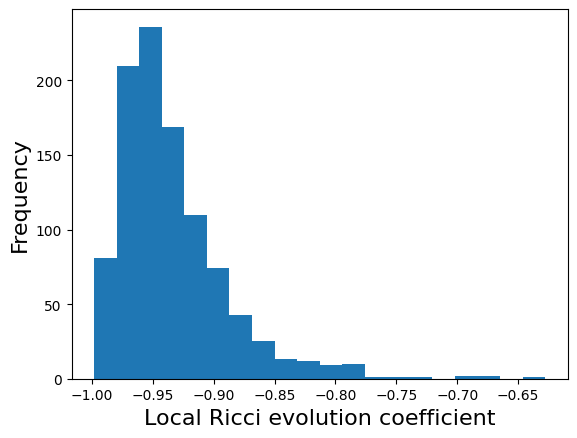

In [5]:
# Load dataset
X_train_CIFAR, y_train_CIFAR, X_test_CIFAR, y_test_CIFAR = DatasetFactory.load_CIFAR((0,1), device=device)

# Train model
model = DNN(input_dimension=3*32*32, hidden_units=50, depth=15, vision_model=True).to(device=device)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_CIFAR,
    y_train=y_train_CIFAR,
    X_test=X_test_CIFAR,
    y_test=y_test_CIFAR
)

# Calculate local Ricci evolution coefficients
local_ricci = Ricci_Coefficients(
    model, X_test_CIFAR, 50
).local_ricci_coefficient(curv='Augmented-Forman-Ricci')

# Plot histogram
_ , _ , _ = plt.hist(local_ricci,bins=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Local Ricci evolution coefficient", fontsize=16)
plt.show()